# Data analysis project for marketing campaigns

**Name** - Kushal Ahuja     

### Introduction 

The Telecom dataset is from the telecommunication company, The company recently launched a campaign for marketing to promote their telecom services plan and acquire new customers as well as target their current potential consumers. The organisation wants help developing a understanding their customers throught analysis practices and thus acknowledging the customer segments which demonstrate the positive response towards their marketing campaign.

### About the Data Dictionary

- **Variable Name** - Description
- **age** - Age
- **job** - Type of job
- **marital** - Marital status
- **education** - Level of education
- **default** - Has credit in default
- **balance** - Average yearly balance
- **housing** - Has a housing loan
- **loan** - Has a personal loan
- **contact** - Contact communication type
- **day** - Day of contact
- **month** - Month of contact
- **duration** - Last contact duration
- **campaign** - Number of contacts performed during this campaign and for this client
- **pdays** - Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- **previous** - Number of contacts performed before this campaign and for this client
- **poutcome** - Outcome of the previous marketing campaign
- **emp.var.rate** - employment variation rate - quarterly indicator (numeric)
- **cons.price.idx** - consumer price index - monthly indicator (numeric)
- **cons.conf.idx** - consumer confidence index - monthly indicator (numeric)
- **euribor3m** - euribor 3 month rate - daily indicator (numeric)
- **nr.employed** - number employed - quarterly indicator (numeric)
- **y** - Did the client subscribe to a Telecom plan 

###  Problem Statement

The company do not have the insights required to target certain group of customers according to the characteristics employed in their database, this problem needs to be solved using decriptive statistics and exploratory data analysis and thus resulting in the data-driven insights which is helpful in making decisions for the company's marketing campaign

### Relevant Questions

1. Are there any changes or distribution of subscription according to the profession or job of the person
2. What role does marital status play on the subscription rate among the customers
3. How is Educational background is relevant to the subscription

### Hypotheses Addressed

1. Does specific jobs have a higher chance of subscribing to the telecom services as compared to others, the company can make and append the marketing campign according to the analysis.
2. What is the difference between the distribution of subscription among the different marital status and what are there subcription rate when compared to each other.
3. Does the educational backgrond impact the subscription rate and if it does which background are more likely to have the subscription

#### Importing the libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading the Dataset 

In [80]:
df = pd.read_csv ('/Users/ahuja/Desktop/TeleCom_Data-1.csv', delimiter='";"')

/var/folders/x8/hnnfgb_x2pld5b8q59wy9h_80000gn/T/ipykernel_72538/697754334.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv ('/Users/ahuja/Desktop/TeleCom_Data-1.csv', delimiter='";"')


In [81]:
df.head()

,"""age;""""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""""""
0,"""40;""""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon"""";151;1;999;0;""""nonexistent"""";1.1;93.994;...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""56;""""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon"""";307;1;999;0;""""nonexistent"""";1.1;93.994;...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""45;""""services""","""married""","""basic.9y""","""unknown""","""no""","""no""","""telephone""","""may""","""mon"""";198;1;999;0;""""nonexistent"""";1.1;93.994;...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"""59;""""admin.""","""married""","""professional.course""","""no""","""no""","""no""","""telephone""","""may""","""mon"""";139;1;999;0;""""nonexistent"""";1.1;93.994;...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"""41;""""blue-collar""","""married""","""unknown""","""unknown""","""no""","""no""","""telephone""","""may""","""mon"""";217;1;999;0;""""nonexistent"""";1.1;93.994;...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### As the dataset is having special characters and some of the colums are not splitted, the following code is processed using the replece, strip and split function to clean the dataset 

In [82]:
# Removing the special charaters and spliting the column and its records

with open('/Users/ahuja/Desktop/TeleCom_Data-1.csv', 'r') as file:
    test1 = file.readlines()
    df_cleaned = [x.replace('"', '').strip().split(';') for x in test1]

# Now Converting the output into the dataframe

df2 = pd.DataFrame(df_cleaned[1:], columns=df_cleaned[0])



### Evaluating the first ten rows to see if the dataset is cleaned from special characters 

In [83]:
df2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
8,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
9,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


### Evaluating the datatypes 

In [84]:
df2.dtypes

age               object
job               object
marital           object
education         object
default           object
housing           object
loan              object
contact           object
month             object
day_of_week       object
duration          object
campaign          object
pdays             object
previous          object
poutcome          object
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y                 object
dtype: object

#### Due to cleaning the dataset, the format of all attributes are changed to object, so to convert the columns in numerical and categorical according to the data dictionary, I have assigned them in the following code

In [85]:
# Converting the datatypes of the data frame

for a in df2.columns:
    try:
        df2[a] = pd.to_numeric(df2[a])
    except ValueError:
        pass

### Evaluating the datatypes after converting the dataset


In [86]:
df2.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Data Cleaning

As witnessed from the dataset, some columns are not splitted and the dataset has " " in each record, to combat this issue and remove the special character, the following code is performed

### Checking for missing values 

In [87]:
df2.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Checking for unique values 

In [88]:
df2.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [89]:
# Calculating the value counts for each column using value_counts function to interpret the distinct unique values

valColumn = {col: df2[col].value_counts() for col in df2.columns}
    
print(valColumn)



{'age': 31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64, 'job': admin.           10422
blue-collar       9253
technician        6742
services          3967
management        2923
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64, 'marital': married     24921
single      11568
divorced     4611
unknown        80
Name: marital, dtype: int64, 'education': university.degree      12166
high.school             9513
basic.9y                6044
professional.course     5241
basic.4y                4175
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64, 'default': no         32581
unknown     8596
yes            3
Name: default, dtype: int64, 'housing': yes        21571
no         18619
un

### Checking for duplicate values

In [90]:
#duplicates

df2.duplicated().sum()

12

In [91]:
df2.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41175,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41176,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41177,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41178,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [92]:
# Droping the duplicates from the dataset

dfrows = df2.shape[0]
df2 = df2.drop_duplicates()

In [93]:
df2.duplicated().sum()

0

In [94]:
# checking unique values in pdays as it consists of value 999 many times
unique_pdays = df2['pdays'].unique()
print(unique_pdays)

[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]


In [95]:
df2['pdays'].value_counts()

999    39655
3        439
6        411
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         25
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

#### Got to know that '999' indicates the missing values in the pdays, I have not replaced or filled this as I will not be using this column for the analysis

## Descriptive Statistics

In [96]:
df2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000
mean,40.021449,258.311237,2.568087,962.506073,0.172756,0.081937,93.575563,-40.502261,3.621425,5167.052308
std,10.419022,259.325938,2.770530,186.835214,0.493782,1.570960,0.578761,4.627020,1.734375,72.230165
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [97]:
# Descriptive statistics for the categorical columns

categorical_columns = df2.describe(include=[object]).transpose()

print(categorical_columns)

             count unique                top   freq
job          41168     12             admin.  10419
marital      41168      4            married  24914
education    41168      8  university.degree  12162
default      41168      3                 no  32570
housing      41168      3                yes  21566
loan         41168      3                 no  33931
contact      41168      2           cellular  26131
month        41168     10                may  13763
day_of_week  41168      5                thu   8617
poutcome     41168      3        nonexistent  35547
y            41168      2                 no  36531


### Demonstrating the hypothesis using Exploratory Data Analysis

1. Does specific jobs have a higher chance of subscribing to the telecom services as compared to others, the company can make and append the marketing campign according to the analysis.
2. What is the difference between the distribution of subscription among the different marital status and what are there subcription rate when compared to each other.
3. Does the educational backgrond impact the subscription rate and if it does which background are more likely to have the subscription

### 1. The relation between the job and subscription

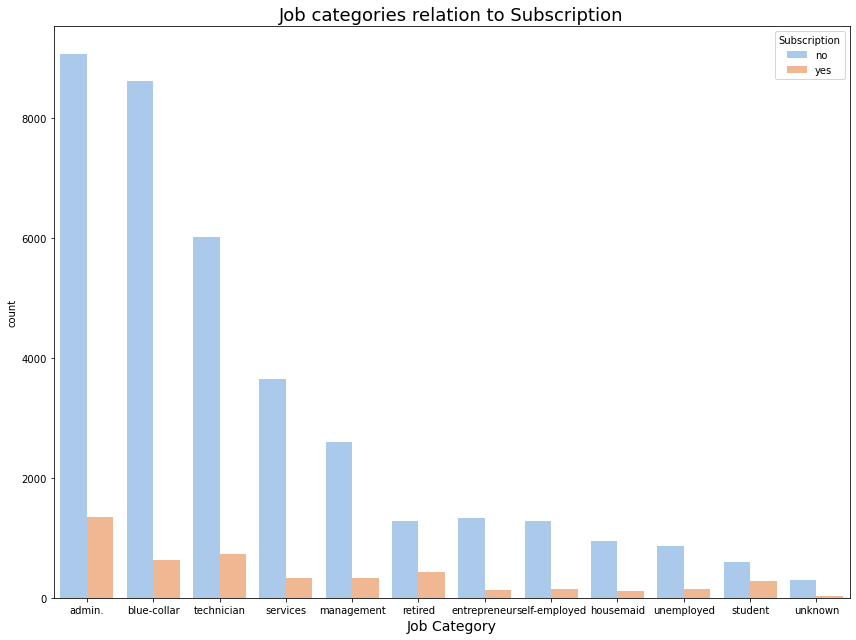

In [98]:
plt.figure(figsize=(12,9))
sns.countplot(data=df2, x='job', hue='y', order=df2['job'].value_counts().index, palette = 'pastel')
plt.title('Job categories relation to Subscription', fontsize=18)
plt.xlabel('Job Category', fontsize=14)
plt.legend(title='Subscription')
plt.tight_layout() #used tight_layout() function to automatically adjusts the figure size and the elements as to avoid overlapping between the columns 
plt.show()

### Calculating and plotting the Subscription rate among the Job Categories

In [99]:
# Converting the subscription column i.e., Y in numerical values to calculate the subcription rate and plot them
df2['y'] = df2['y'].map({'yes': 1, 'no': 0}) # used map() function here

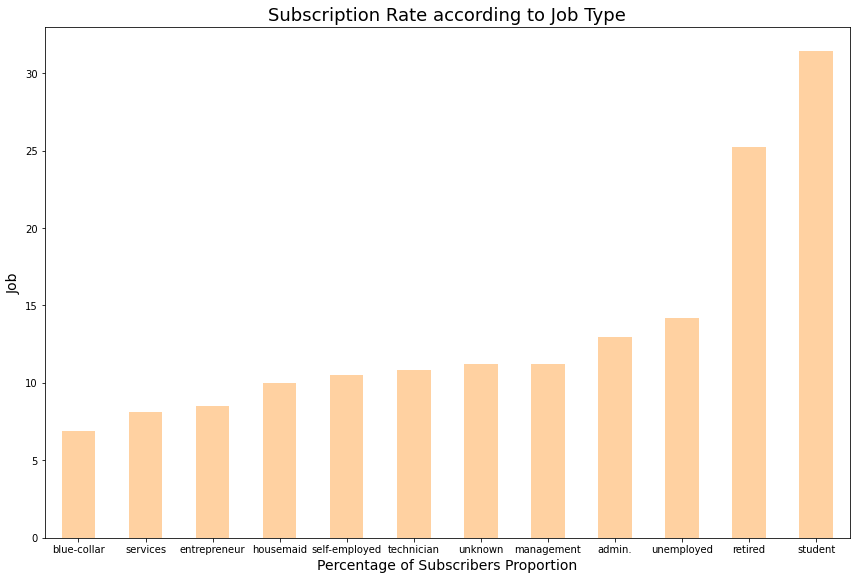

In [100]:
# Calculating the subscription rate of job by using the group by and mean function and converting the result in percentage
subscription_job = df2.groupby ('job')['y'].mean() * 100

# Plotting
plt.figure(figsize=(12, 9))
subscription_job.sort_values().plot(kind='bar', color='#FFD1A1')
plt.title("Subscription Rate according to Job Type", fontsize=18)
plt.xlabel("Percentage of Subscribers Proportion", fontsize=14)
plt.ylabel("Job", fontsize=14)
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

It is evident from the above graph that the count of admin jobs, blue-collar jobs, technicians are more, but in comparison to the conversion rate for subcription, it can be noticed that the students and retired people have a higher conversion rate, thus company can also imply marketing campigns aligned with the studnets and retired population for better conversion, likewise the company should also focus on the people from majority of the jobs i.e., admin, blue-collar and technician, they can create a marketing campign aligning to the jobs using this analysis.

### 2. The relation between Subscription and Marital Status

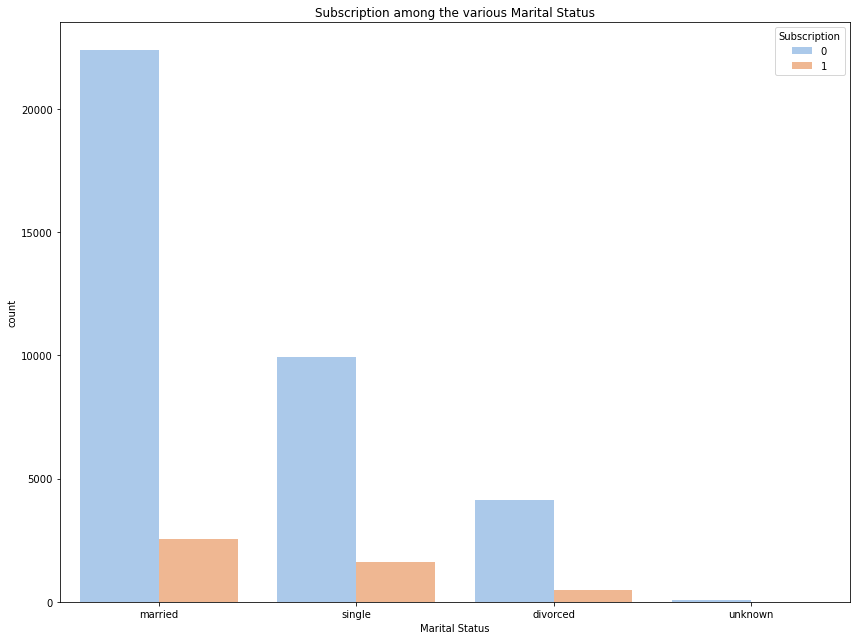

In [101]:
plt.figure(figsize=(12,9))
sns.countplot(data=df2, x='marital', hue='y', order=df2['marital'].value_counts().index, palette = 'pastel')
plt.title("Subscription among the various Marital Status")
plt.xlabel("Marital Status")
plt.legend(title='Subscription')
plt.tight_layout()
plt.show()

It is evident from the barchart that the married customers are in majority in terms of the count, followed by single and divorced, based on this insight the company can target the customer group according to their marital status. 
Moreover, it can also be witnessed from the figure that customers who are singles have higher subscription rate in comparison of others marital status. 
To calculate the subscription rate among the customers based on the marital status, the following procedure is performed.

### Calculating the subscrption rate of customers according to marital status

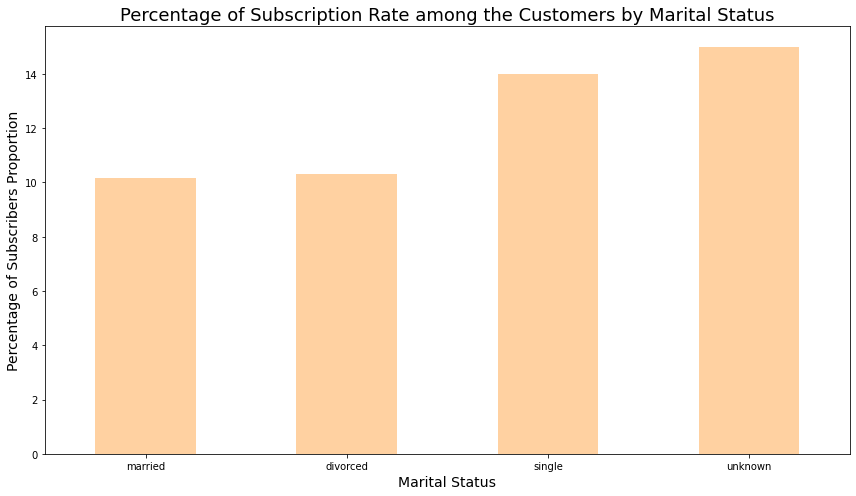

In [102]:
# generating the proportion of subscription rate among the marital status of customers 
subscription_rate_of_m = df2.groupby('marital')['y'].mean() * 100 # used the 'y' column directly since it is converted in the above hypothesis 

# Plotting the figure

plt.figure(figsize=(12, 7))
subscription_rate_of_m.sort_values().plot(kind='bar', color='#FFD1A1')
plt.title("Percentage of Subscription Rate among the Customers by Marital Status", fontsize = 18)
plt.ylabel("Percentage of Subscribers Proportion", fontsize = 14)
plt.xlabel("Marital Status", fontsize = 14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


It is evident from the above the above bar chart that the subscription rate or the conversion rate when compared to the count of individual attribute is highest for people who are single, followed by divorced and married. 
The company can make marketing campign aliging to this analysis as they might target the married as the conversion rate is lower and populdatio is higher, or in contrast can consider the specific marketing ads or campign for single and divorced as the conversion rate is higher. 

### 3. The relation between Eduaction background and Subscription Rate

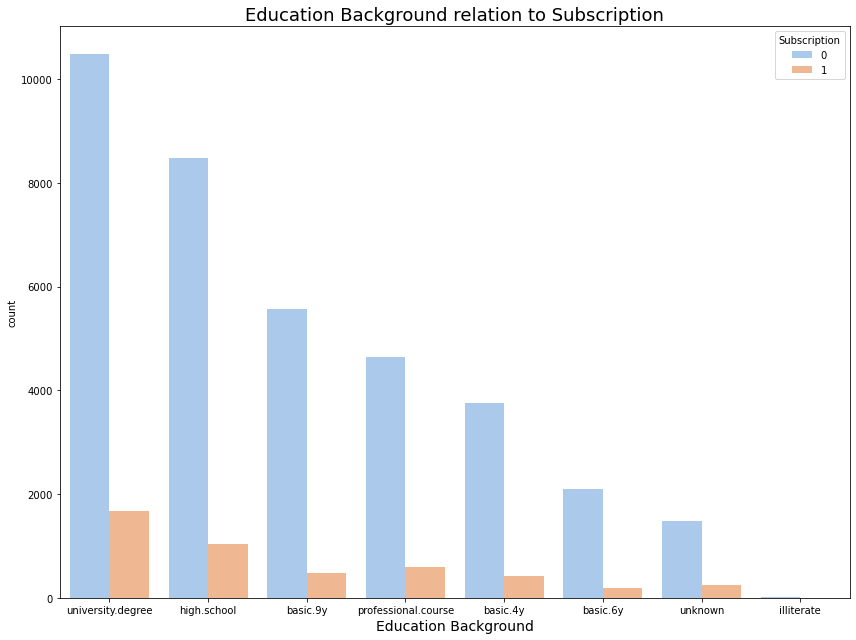

In [103]:
plt.figure(figsize=(12,9))
sns.countplot(data=df2, x='education', hue='y', order=df2['education'].value_counts().index, palette = 'pastel')
plt.title('Education Background relation to Subscription', fontsize=18)
plt.xlabel('Education Background', fontsize=14)
plt.legend(title='Subscription')
plt.tight_layout() 
plt.show()

It can be inferred from the chart that the count of university degree and high school are the most which means that majority of the customers are having this eduactional background, lets calculate the subscription rate from this attribute, which will help processing the analysis further

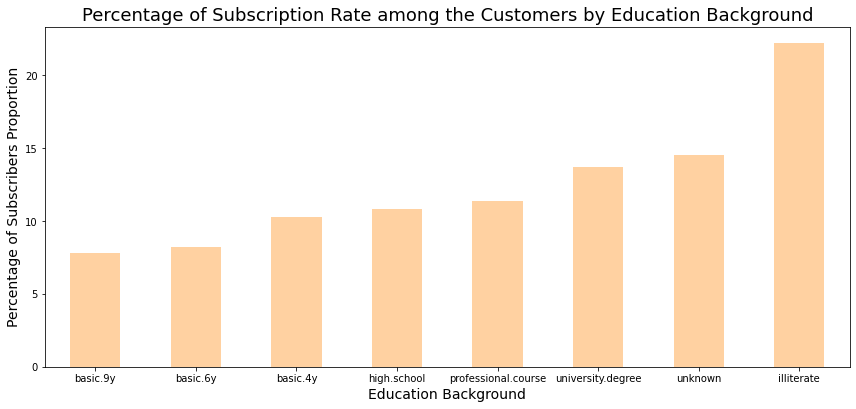

In [104]:
# generating the proportion of subscription rate among the marital status of customers 
subscription_rate_edu = df2.groupby('education')['y'].mean() * 100 # used the 'y' column directly since it is converted in the above hypothesis 

# Plotting the figure

plt.figure(figsize=(12, 7))
subscription_rate_edu.sort_values().plot(kind='bar', color='#FFD1A1')
plt.title("Percentage of Subscription Rate among the Customers by Education Background", fontsize = 18)
plt.ylabel("Percentage of Subscribers Proportion", fontsize = 14)
plt.xlabel("Education Background", fontsize = 14)
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


It is evident from the above chart that individuals belonging to literate and university degree has a higher subscription rate compared to other, thus company can imply the marketing techniques to target the consumers of this group of education background.

# Assignment 3 starts from here 

## Modelling 

In [105]:
from sklearn.preprocessing import LabelEncoder

# Using label encoder dunction for categorical variables to perform modelling procedure
label_enc = LabelEncoder()

# Apply label encoding to each categorical column
for column in df2.select_dtypes(include=['object']).columns:
    df2[column] = label_enc.fit_transform(df2[column])

### Scaling the dataset 

In [106]:
from sklearn.preprocessing import StandardScaler

# Using the function Standard Scaler to perform scaling
scal = StandardScaler()

# List of numerical columns to scale
num_columns = ['age', 'duration', 'pdays', 'previous','campaign', 'emp.var.rate', 'euribor3m'
               ,'cons.conf.idx','cons.price.idx', 'nr.employed']

# Apply scaling to the numerical columns
df2[num_columns] = scal.fit_transform(df2[num_columns])

# Display the first few rows of the dataframe after scaling
df2.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-0.002059,0,1,1,0,0,0,1,6,1,...,-0.565995,0.195329,-0.349866,1,0.648059,0.722995,0.886599,0.712412,0.331551,0
1,1.533613,7,1,3,0,0,2,1,6,1,...,-0.565995,0.195329,-0.349866,1,0.648059,0.722995,0.886599,0.712412,0.331551,0
2,0.477839,7,1,2,1,0,0,1,6,1,...,-0.565995,0.195329,-0.349866,1,0.648059,0.722995,0.886599,0.712412,0.331551,0
3,1.821551,0,1,5,0,0,0,1,6,1,...,-0.565995,0.195329,-0.349866,1,0.648059,0.722995,0.886599,0.712412,0.331551,0
4,0.093921,1,1,7,1,0,0,1,6,1,...,-0.565995,0.195329,-0.349866,1,0.648059,0.722995,0.886599,0.712412,0.331551,0


### Splitting the dataset 

I have splitted the dataset into 80:20 ratio.

In [107]:
from sklearn.model_selection import train_test_split

# Defining the feature/attributes and the target variable i.e. Y
X = df2.drop('y', axis=1)
y = df2['y']

# Splitting the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using the shape function to check the dataframe.
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((32934, 20), (8234, 20), (32934,), (8234,))

### Implementing Logistic Regression

The reason of choosing this model to implement is that Logistic Regression is the baseline model to implement and interpret the model result and prediction. 
This is one of the **Parametric Model** which needs to be used. 

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Defining the Logistic Regression Model  with increased max_iter beacause of large telecom dataset and so to better fit the model  
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Training the Logistic Regression model and .fit is used as MLE (Maximum Likelihood Estimation)
logreg.fit(X_train, y_train)

# Predicting the result on test dataset using the model
logreg_predictions = logreg.predict(X_test)
logreg_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilities are for the positive classes

# Evaluating the performance of model using the common evaluation metrics which is imported - 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_precision = precision_score(y_test, logreg_predictions)
logreg_recall = recall_score(y_test, logreg_predictions)
logreg_f1 = f1_score(y_test, logreg_predictions)
logreg_roc_auc = roc_auc_score(y_test, logreg_prob) #As ROC-AUC is being calculated on probabilities

(logreg_accuracy, logreg_precision, logreg_recall, logreg_f1, logreg_roc_auc) 

# Printing the results

print("Logistic Regression Model Evaluation")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1 Score:", logreg_f1)
print("ROC-AUC Score:", logreg_roc_auc)


Logistic Regression Model Evaluation
Accuracy: 0.9145008501335924
Precision: 0.6879432624113475
Recall: 0.42358078602620086
F1 Score: 0.5243243243243243
ROC-AUC Score: 0.9376450780572162


### Plotting the AUC-ROC Curve

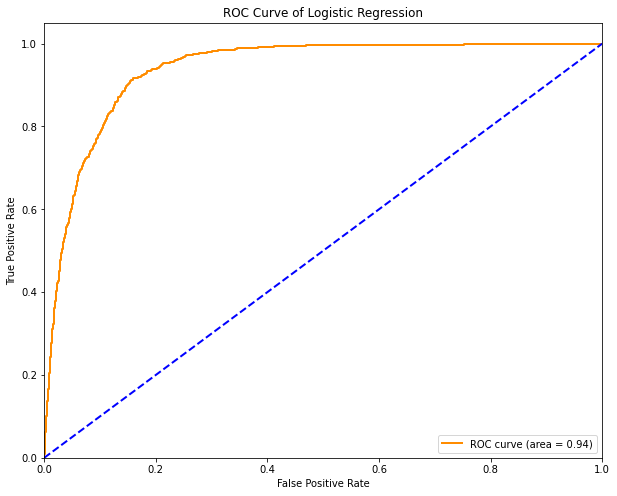

In [109]:
from sklearn.metrics import roc_curve, auc

# Calculating the  true-positive rates and false-positive rates
tpr, fpr, thresholds = roc_curve(y_test, logreg_prob)

# Calculating the AUC
roc_auc = auc(tpr, fpr)

# Plotting the curve
plt.figure(figsize=(10, 8))
plt.plot(tpr, fpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})') # to display the score and used f-string
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.legend(loc="lower right")
plt.show()


### Estimation Method (Maximum Likelihood Estimation)

/var/folders/x8/hnnfgb_x2pld5b8q59wy9h_80000gn/T/ipykernel_72538/2916325567.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_synth = (X_synth > 0).astype(np.int)
/Users/ahuja/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


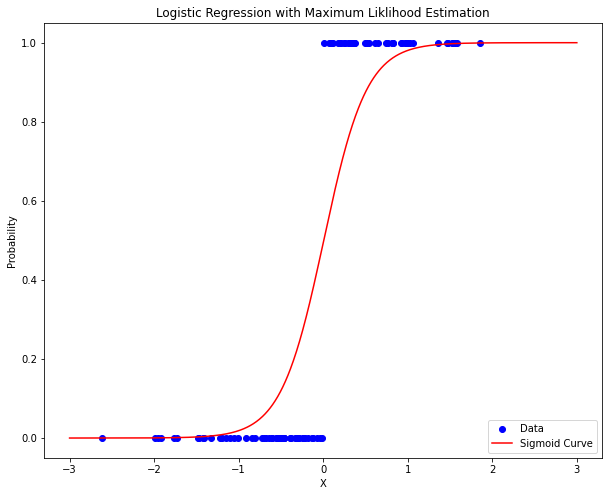

In [110]:
# Generating the synthetic data
np.random.seed(42) # setting the seed for reproducibility
X_synth = np.random.randn(100, 1)
y_synth = (X_synth > 0).astype(np.int)

# Now fitting the logistic regression model to estimate
logreg_synthetic = LogisticRegression()
logreg_synthetic.fit(X_synth, y_synth)

# Generating values for X
X_test_synthetic = np.linspace(-3, 3, 1000).reshape(-1, 1)

# Using the fitted model to predict the outcome
y_proba_synthetic = logreg_synthetic.predict_proba(X_test_synthetic)

# Plotting  the curve
plt.figure(figsize=(10, 8))
plt.scatter(X_synth, y_synth, c='blue', label='Data')
plt.plot(X_test_synthetic, y_proba_synthetic[:, 1], color='red', label='Sigmoid Curve') # Because Sigmoid curve is used to estimate
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Logistic Regression with Maximum Liklihood Estimation')
plt.legend(loc='lower right')
plt.show()


The above graph visualises the relationship of logistic regression using the Maximum Liklihood Estimation, 
- The blue dot represents the observations, this observations by the model has been predicted for the value as 1 or 0 for the probability of subscribing to the telecom services

- The red curve is the sigmoid curve which illustrates the output of what happens to the chance of being in the different class when the prediction variable is changed.

- The point of probabiltiy of 0.5 is in the middle of red line which is like a breakeven for predicting the dependent variable, as probabiltiy above 0.5 will lead to class 1 and below the prediction value of 0.5 is assigned to class 0. 

### Implementing Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

# Defining the classifier
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Training the model with training set
random_forest.fit(X_train, y_train)

# Predicting on the testing set using the model
rf_predictions = random_forest.predict(X_test)
rf_prob = random_forest.predict_proba(X_test)[:, 1] 

# Evaluating the performance of model using the evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_prob)

# Printing the results
print("Random Forest Results")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("ROC-AUC Score:", rf_roc_auc)


Random Forest Results
Accuracy: 0.9151080884138936
Precision: 0.6452476572958501
Recall: 0.5262008733624454
F1 Score: 0.5796752856283824
ROC-AUC Score: 0.9452274764264941


### Plotting the AUC-ROC Curve

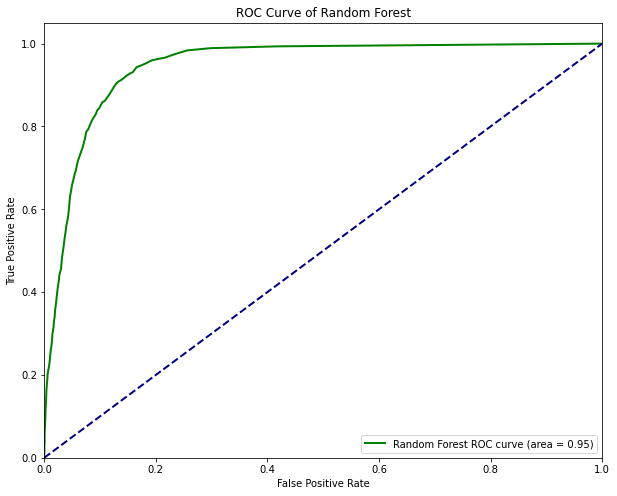

In [112]:
# Calculating the  true-positive rates and false-positive rates
tpr_rf, fpr_rf, thresholds_rf = roc_curve(y_test, rf_prob)

# Calculating the AUC
roc_auc_rf = auc(tpr_rf, fpr_rf)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(tpr_rf, fpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})') # to display the score and used f-string
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.legend(loc="lower right")
plt.show()


## Model Comparison

First, I have plotted both the Logistic Regression and Random Forest model score on the ROC-AUC curve for easier comparison between them 

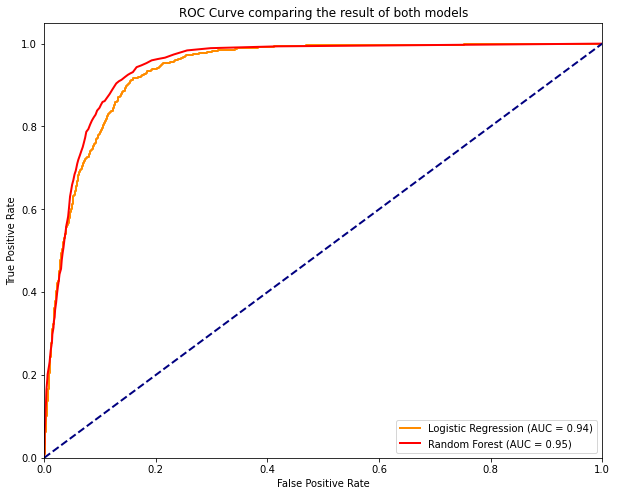

In [113]:
# As fpr_rf, tpr_rf, roc_auc_rf for Random Forest as calculated previously

plt.figure(figsize=(10, 8))

# Plotting Logistic Regression ROC
plt.plot(tpr, fpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='darkorange', lw=2)

# Plotting the Random Forest ROC
plt.plot(tpr_rf, fpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='red', lw=2)

# Plotting the  baseline (Models AUC would be 0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labeling the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve comparing the result of both models')
plt.legend(loc="lower right")
plt.show()


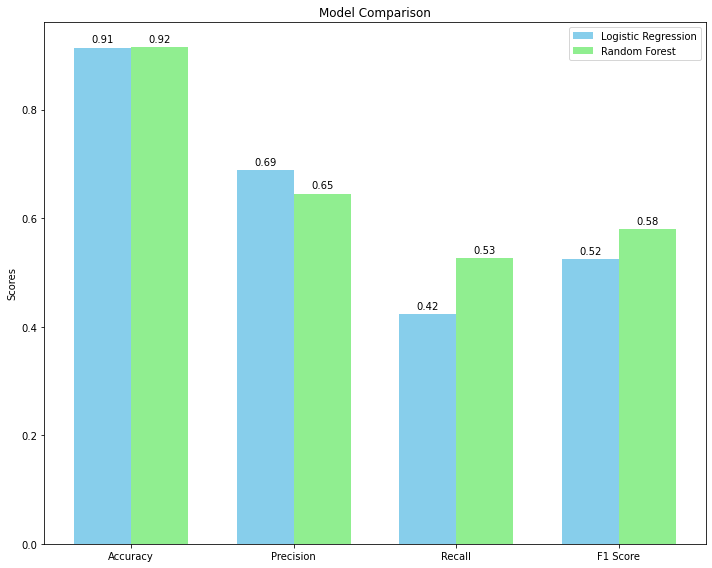

In [114]:

# Assuming you have the following metrics from both classifiers
logreg_metrics = [logreg_accuracy, logreg_precision, logreg_recall, logreg_f1]
rf_metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1]

# Defining the metrics and their scores from both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
logreg_values = logreg_metrics
rf_values = rf_metrics

#  the positions of the bars
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars in graph

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width/2, logreg_values, width, label='Logistic Regression', color='skyblue')
rects2 = ax.bar(x + width/2, rf_values, width, label='Random Forest', color='lightgreen')

# Adding labels and titles
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Attaching score above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

### Business Insights

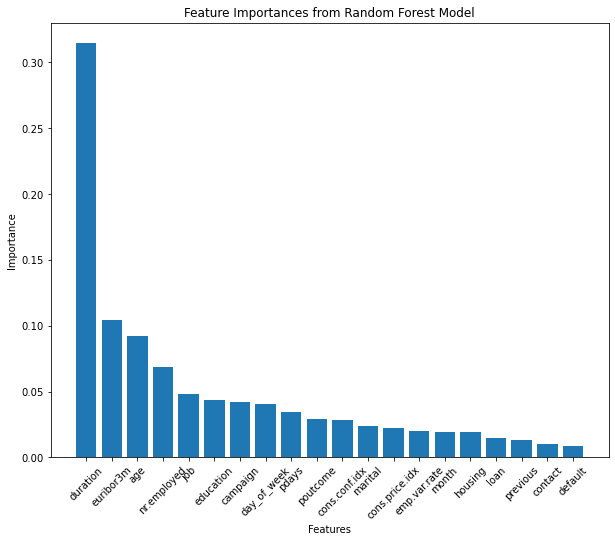

In [115]:

# Generating the important features from the Random Forest model to generatre insights from the model
feature_importance = random_forest.feature_importances_

# Sorting the feature  in descending order for better interpretation
sorted_ind = np.argsort(feature_importance)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importances from Random Forest Model")
plt.bar(range(X_train.shape[1]), feature_importance[sorted_ind], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_ind], rotation=45, size=10)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


The above bar chart states the feature or attribute importance in respect of **Random forest Model** to the outcome of marketing campign, the business insights generated through this chart are as follow- 

- **Duration** column is the most significant feature in terms of the better success of marketing campign, however the limitation for this is that the duration is not acknowledged before the call is connected. 

- The **age** column has also shown more response that other features, implying that for taking any business decisiion and for customer segementation, the ceratin age group can be better for the succcess of marketing campign 

- The kind of **Job** also affect how well the marketing campign performs, which suggests that company can focus on ceratin job roles which are more likely to subscribe.

- **Education** also plays a similar role as job, by having little less importance than job, The company can also target the customers on the basis of Education, like which education level subscribe the most or which education level has more potential or people to subscribe. 

The above insights attributes is also described using EDA below



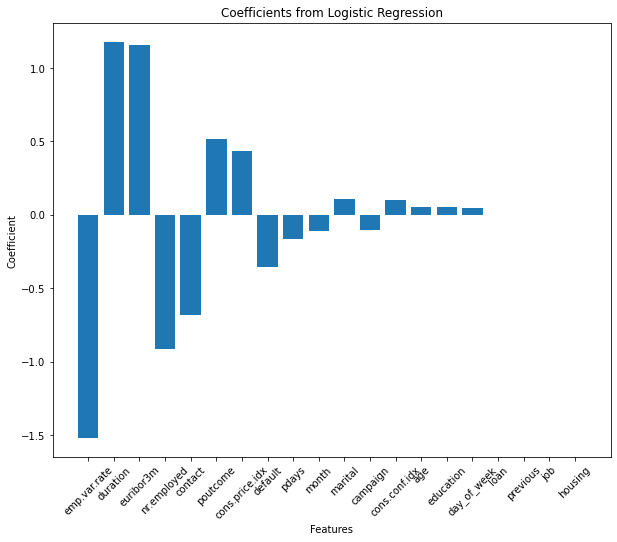

In [116]:
# Generating the coefficients from the model
logreg_coefficients = logreg.coef_[0]

# Sorting the feature  in descending order for better interpretation
sorted_ind_logreg = np.argsort(np.abs(logreg_coefficients))[::-1]

# Plotting the coefficients of Logistic Regression Model
plt.figure(figsize=(10, 8))
plt.title("Coefficients from Logistic Regression")
plt.bar(range(X_train.shape[1]), logreg_coefficients[sorted_ind_logreg], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_ind_logreg], rotation=45)
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.show()

The above bar chart states the feature or attribute importance from the logistic regression model to the outcome of marketing campign, the business insights generated through this chart are as follow- 


- **Duration** attribute has more significant improtance than any other feature, thus company should focus on customer segementation with the use of data from the Duration Column.

- The **Contact** attribute has shown negative relationship with the success rate of marketing campign, thus company should not focus on the Contact feature for grouping the customers and for not promoting the campaign. 

- The similar result is shown for **Default** attribute, thus may take similar decision as Contact, the default attribute has not significant correlation with the target variable i.e. y. 

- The features like **Age** and **Education** shows a little positive response to the campaign, thus company can focus on delivering better marketing campaign focused on this category, the more in depth education domain which should be focused on are described below.



References 

https://www.freecodecamp.org/news/with-open-in-python-with-statement-syntax-example/#:~:text=To%20use%20the%20open%20function,file%20in%20a%20print%20function.

https://pandas.pydata.org/docs/reference/general_functions.html

https://matplotlib.org/stable/api/pyplot_summary.html

https://www.simplilearn.com/tutorials/python-tutorial/map-in-python#:~:text=Map%20in%20Python%20is%20a,to%20the%20map%20in%20Python.

https://numpy.org/doc/stable/reference/

https://numpy.org/doc/stable/reference/routines.math.html

https://matplotlib.org/stable/tutorials/pyplot.html 

https://matplotlib.org/stable/api/pyplot_summary.html

https://seaborn.pydata.org/
